### Introduction
Experiment with different search algorithms and heuristics for a agent that performs progression search to solve planning problems. Use the results to answer questions about designing planning systems

### Setting up notebook to use the provided code

- Create a data class to contain our experiment data
- Modify main method from run_search.py to be able to execute from this notebook
- Modify run_search method from \_utils.py to be able to execute from this notebook

In [21]:
from dataclasses import make_dataclass
from timeit import default_timer as timer
import run_search as rs
import _utils as utils


Experiment = make_dataclass("Experiment", [("Problem_Name", str), ("Search_Algo", str), ("Heuristic", str),
                                           ("Actions", int), ("Expansions", int), ("Goal_Tests", int), ("New_Nodes", int),
                                           ("Plan_Length", int), ("Elapsed_Time", float)])

def main_modified(p_choices, s_choices):
    problems = [rs.PROBLEMS[i-1] for i in map(int, p_choices)]
    searches = [rs.SEARCHES[i-1] for i in map(int, s_choices)]

    results = [] # list of experiments
    for pname, problem_fn in problems:
        for sname, search_fn, heuristic in searches:
            problem_instance = problem_fn()
            heuristic_fn = None if not heuristic else getattr(problem_instance, heuristic)
            result = run_search_modified(problem_instance, search_fn, heuristic_fn)
            results.append(Experiment(pname, sname, heuristic, len(result[0].actions_list), 
                                      result[0].succs, result[0].goal_tests, result[0].states, result[1], result[2]))
    return results

def run_search_modified(problem, search_function, parameter=None):
    ip = utils.PrintableProblem(problem)
    start = timer()
    if parameter is not None:
        node = search_function(ip, parameter)
    else:
        node = search_function(ip)
    end = timer()
    return (ip, len(node.solution()), (end - start))


### Run searches on Cargo problems

In [12]:
all_searches = [x for x in range(1, 12)] # Used for Cargo problem 1 and 2
cargo_3_searches = [x for x in range(1, 11)] # Used for Cargo problem 3
cargo_4_searches = [x for x in range(1, 10)] # Used for Cargo problem 4

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [16]:
# Ran 1 search per cargo problem to get aa bit more feedback from the computations

# Cargo 1 problem
search_results_c1  = main_modified([1], all_searches)
df_c1 = pd.DataFrame(search_results_c1)

In [18]:
# Cargo 2 problem
search_results_c2  = main_modified([2], all_searches)
df_c2 = pd.DataFrame(search_results_c2)

In [20]:
search_results_c3  = main_modified([3], cargo_3_searches)
df_c3 = pd.DataFrame(search_results_c3)

In [27]:
search_results_c4  = main_modified([4], cargo_4_searches)
df_c4 = pd.DataFrame(search_results_c4)

#### Combine the dataframe

In [54]:
df_combined = pd.concat([df_c1, df_c2, df_c3, df_c4]) 

In [55]:
df_combined = df_combined.set_index(["Problem_Name", "Search_Algo"])
df_combined

Heuristic  Actions  \
Problem_Name        Search_Algo                                              
Air Cargo Problem 1 breadth_first_search                                20   
                    depth_first_graph_search                            20   
                    uniform_cost_search                                 20   
                    greedy_best_first_graph_search  h_unmet_goals       20   
                    greedy_best_first_graph_search  h_pg_levelsum       20   
                    greedy_best_first_graph_search  h_pg_maxlevel       20   
                    greedy_best_first_graph_search  h_pg_setlevel       20   
                    astar_search                    h_unmet_goals       20   
                    astar_search                    h_pg_levelsum       20   
                    astar_search                    h_pg_maxlevel       20   
                    astar_search                    h_pg_setlevel       20   
Air Cargo Problem 2 breadth_first_search                                72   
                    depth_first_graph_search                            72   
                    uniform_cost_search                                 72   
                    greedy_best_first_graph_search  h_unmet_goals       72   
                    greedy_best_first_graph_search  h_pg_levelsum       72   
                    greedy_best_first_graph_search  h_pg_maxlevel       72   
                    greedy_best_first_graph_search  h_pg_setlevel       72   
                    astar_search                    h_unmet_goals       72   
                    astar_search                    h_pg_levelsum       72   
                    astar_search                    h_pg_maxlevel       72   
                    astar_search                    h_pg_setlevel       72   
Air Cargo Problem 3 breadth_first_search                                88   
                    depth_first_graph_search                            88   
                    uniform_cost_search                                 88   
                    greedy_best_first_graph_search  h_unmet_goals       88   
                    greedy_best_first_graph_search  h_pg_levelsum       88   
                    greedy_best_first_graph_search  h_pg_maxlevel       88   
                    greedy_best_first_graph_search  h_pg_setlevel       88   
                    astar_search                    h_unmet_goals       88   
                    astar_search                    h_pg_levelsum       88   
                    astar_search                    h_pg_maxlevel       88   
Air Cargo Problem 4 breadth_first_search                               104   
                    depth_first_graph_search                           104   
                    uniform_cost_search                                104   
                    greedy_best_first_graph_search  h_unmet_goals      104   
                    greedy_best_first_graph_search  h_pg_levelsum      104   
                    greedy_best_first_graph_search  h_pg_maxlevel      104   
                    greedy_best_first_graph_search  h_pg_setlevel      104   
                    astar_search                    h_unmet_goals      104   
                    astar_search                    h_pg_levelsum      104   

                                                    Expansions  Goal_Tests  \
Problem_Name        Search_Algo                                              
Air Cargo Problem 1 breadth_first_search                    43          56   
                    depth_first_graph_search                21          22   
                    uniform_cost_search                     60          62   
                    greedy_best_first_graph_search           7           9   
                    greedy_best_first_graph_search           6           8   
                    greedy_best_first_graph_search           6           8   
                    greedy_best_first_graph_search           6           8   

### Analyze the search complexity as a function of domain size, search algorithm, and heuristic.

- Analyze the number of nodes expanded against number of actions in the domain.


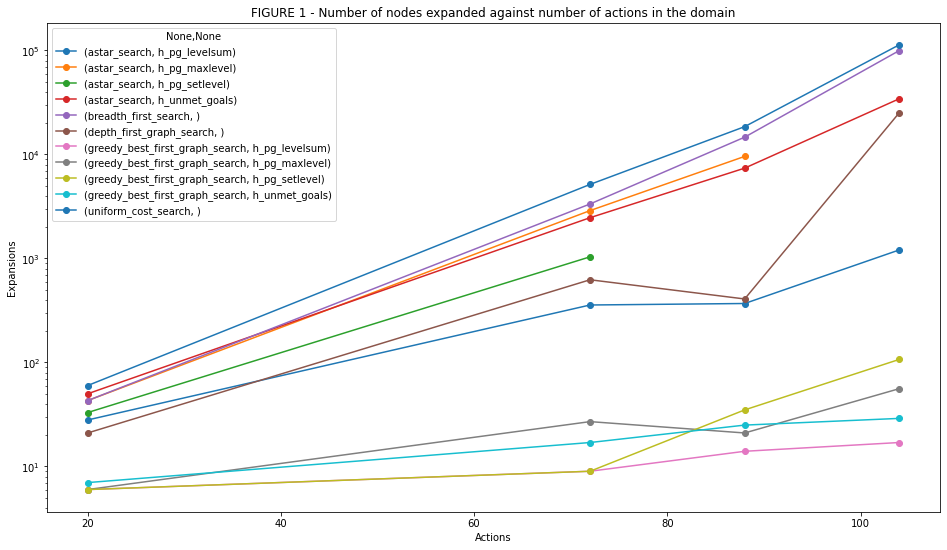

In [160]:
import matplotlib.pyplot as plt

df_plot = df_combined.reset_index()
df_plot = df_plot.set_index('Actions', inplace=False)
df_plot.groupby(['Search_Algo', 'Heuristic'])['Expansions'].plot(ylabel='Expansions', legend=True, marker='o',
                                                                 figsize=(16,9), logy=True,
                                                                 title='FIGURE 1 - Number of nodes expanded against number of actions in the domain')
plt.show()

#### Discussion of results:
All the graph searching algorithms show exponential behavior as the domain size increases. This behavior is illustrated by the nearly straight lines in the log-plot shown above in Figure 1.

Regarding the 3 groups of search algorithms: uninformed, greedy BFS and A*:
- Uninformed search algorithms expands most nodes as expected. In Figure 1 UCS and BFS are at the top of the plot. This is a consequence of having no goal direction, they consider every successor  step, in any direction, equally important.
- At the bottom of Figure 1 we see the 4 greedy BFS searches. With this algorithm the frontier is directed towards the goal, it first expands the node whose estimated distance to the goal is the smallest, resulting in a smaller footprint when it comes to nodes visited.
- Finally we have A* in the middle. This algorithm uses both the knowledge acquired so far while exploring the search space, as well as a heuristic function to point it toward the goal(s). In fact UCS can be viewed as a special case of A* where _h(x) = 0_ for all x. Not surprisingly the results end up between uninformed and greedy BFS.

Regarding heuristic functions:
- A more accurate heuristic function is expected to expand less nodes that a less accurate heuristic. Intuitively _unmet_goals_ and _maxlevel_ are expected to be less accurate and result in more expansions. This is partly supported by the data in Figure 1, here _levelsum_ performs the best indicating that the problems are largely decomposable. Interesting to see that _setlevel_ starts getting in 'trouble' for larger problems Cargo 3 + 4. Maybe it is a lack of interaction between subplans or maybe it pays the price for ignoring interactions among three or more literals.


### Analyze search time as a function of domain size, search algorithm, and heuristic.

- Analyze the search time against the number of actions in the domain.

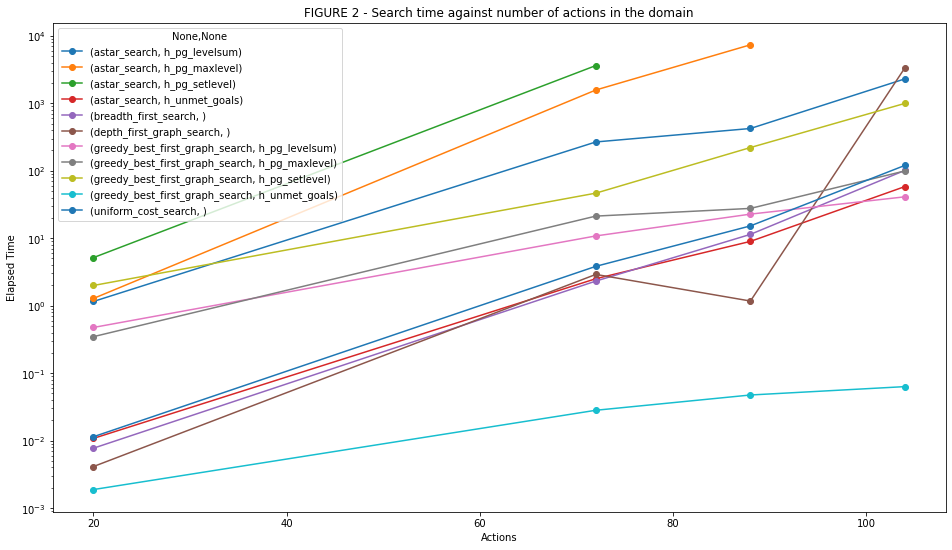

In [162]:
df_plot = df_combined.reset_index()
df_plot = df_plot.set_index('Actions', inplace=False)
df_plot.groupby(['Search_Algo', 'Heuristic'])['Elapsed_Time'].plot(ylabel='Elapsed Time', legend=True, marker='o',
                                                                 figsize=(16,9), logy=True,
                                                                 title='FIGURE 2 - Search time against number of actions in the domain')
plt.show()

#### Discussion of results:
Generally all the algorithms follow a time complexity looking like O(_b^(d+1)_) (worst case) where the tree has a depth d and an average branching factor b; so again the time complexity grows exponentially with the domain size, also illustrated by the nearly straight lines in the log-plot shown above in Figure 2.

Regarding the 3 groups of search algorithms: uninformed, greedy BFS and A*:
- The A* algorithms are the most computational expensive in terms of time. This is no surprise as A* essentially performs an "exhaustive search" using both the knowledge acquired so far while exploring the search space and a heuristic function.
- Uninformed search algorithms perform very well for small domain sizes, that is, are most time efficient. However, they are being overtaken by the greedy BFS as the domain size increases (Cargo 4).

Regarding heuristic functions:
- What was said in the 'Search Complexity' section also applies here. The order of time complexity found in Figure 2 are as expected from a purely functional level (high to low):
 - _setlevel_
 - _maxlevel_
 - _levelsum_
 - _unmet_goals_
 


### Analyze the optimality of solution as a function of domain size, search algorithm, and heuristic.

- Analyze the length of the plans returned by each algorithm on all search problems.

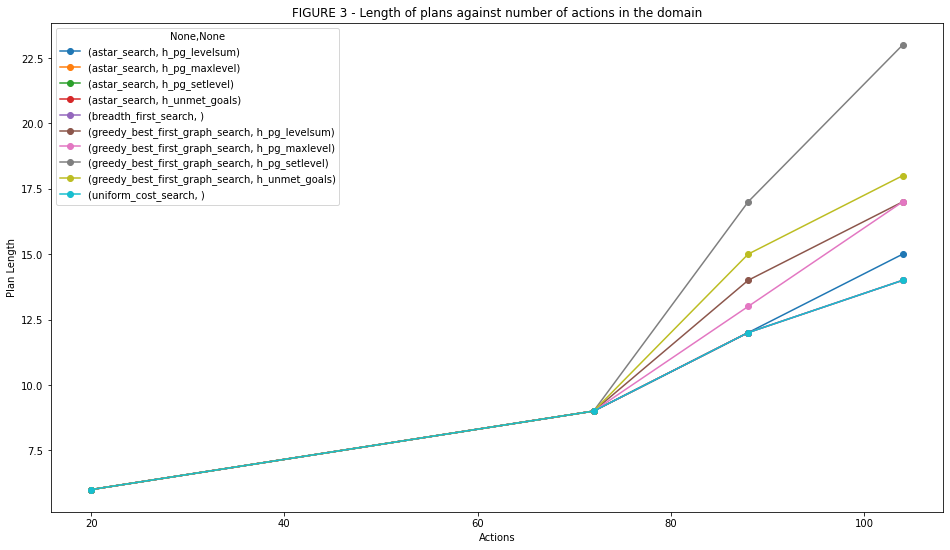

In [163]:
df_plot = df_combined.reset_index()
df_plot = df_plot[df_plot.Search_Algo != 'depth_first_graph_search'] # remove depth_first_graph_search as plan length is 'noise'
df_plot = df_plot.set_index('Actions', inplace=False)
df_plot.groupby(['Search_Algo', 'Heuristic'])['Plan_Length'].plot(ylabel='Plan Length', legend=True, marker='o',
                                                                 figsize=(16,9), logy=False,
                                                                 title='FIGURE 3 - Length of plans against number of actions in the domain')
plt.show()

Note to Figure 3:
1. DFS has beeen removed from the plot as it is not designed for arrriving at optimal plans. 
2. All uninformed and A* searches are overlapping in the bottom blue lines  

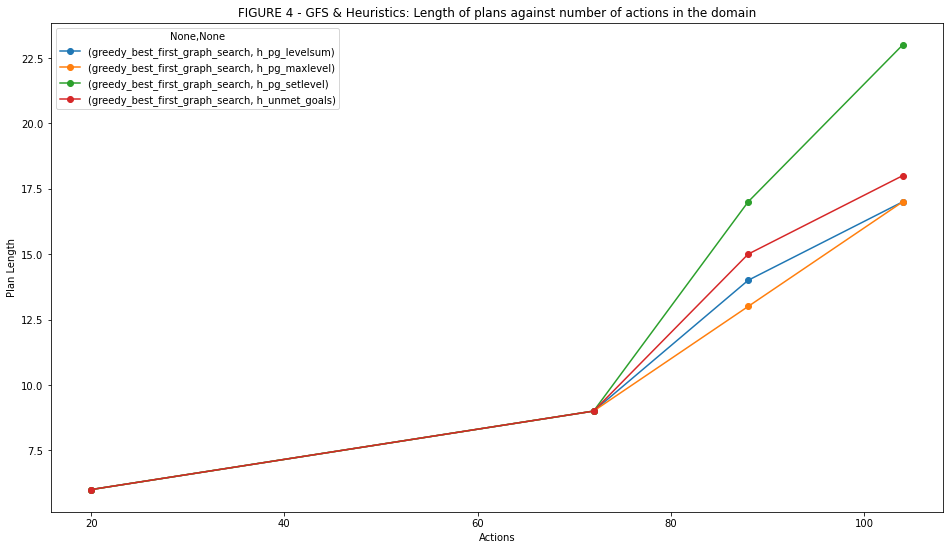

In [164]:
df_plot = df_combined.reset_index()
df_plot = df_plot[df_plot.Search_Algo == 'greedy_best_first_graph_search'] # remove depth_first_graph_search as plan length is 'noise'
df_plot = df_plot.set_index('Actions', inplace=False)
df_plot.groupby(['Search_Algo', 'Heuristic'])['Plan_Length'].plot(ylabel='Plan Length', legend=True, marker='o',
                                                                 figsize=(16,9), logy=False,
                                                                 title='FIGURE 4 - GFS & Heuristics: Length of plans against number of actions in the domain')
plt.show()

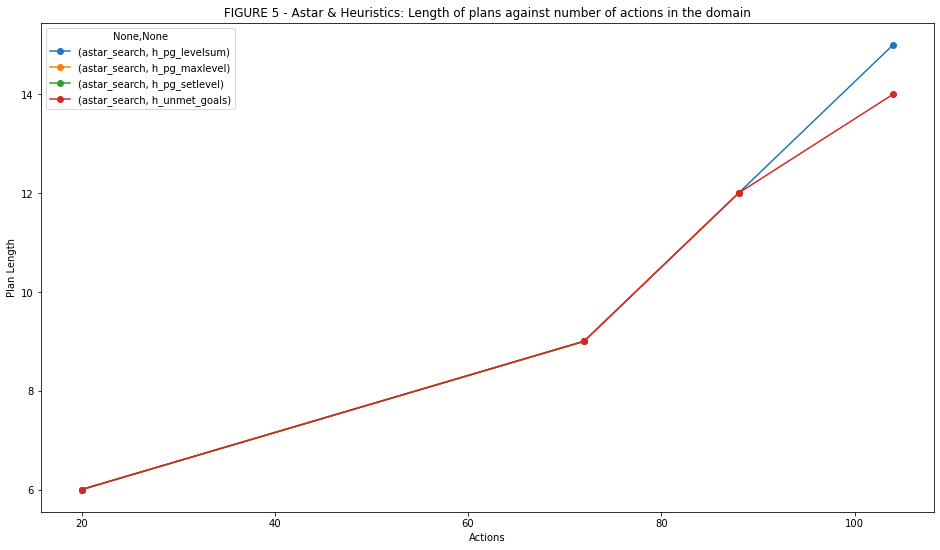

In [165]:
df_plot = df_combined.reset_index()
df_plot = df_plot[df_plot.Search_Algo == 'astar_search'] # remove depth_first_graph_search as plan length is 'noise'
df_plot = df_plot.set_index('Actions', inplace=False)
df_plot.groupby(['Search_Algo', 'Heuristic'])['Plan_Length'].plot(ylabel='Plan Length', legend=True, marker='o',
                                                                 figsize=(16,9), logy=False,
                                                                 title='FIGURE 5 - Astar & Heuristics: Length of plans against number of actions in the domain')
plt.show()

#### Discussion of results
Generally all the algorithms comes up with the ideal plan length for small domain problems (Cargo 1 + 2). For larger problems we see the greedy BFS algorithms move away from optimal plan lengths, that is, getting longer than the optimal solution. This is visualized in Figure 3 + 4. Even A* starts showing differences in plan length for more complex problems, see Figure 5.  

Regarding the 3 groups of search algorithms: uninformed, greedy BFS and A*:
- In general, the greedy BFS is not optimal, that is, the path found may not be the optimal one as illustrated in Figure 4.
- Given that A* uses an admissible heuristic function, then A* is optimal as illustrated in figure 5 (discussed below under heuristic functions ) 
- Uninformed search algorithms in from of Breadth-First-Search and Uniform-Cost-Search are optimal and guaranteed to find thee shortest path, shown by the light-blue line in Figure 3.

Regarding heuristic functions:
- For the A* searches if the heuristic function is admissible then A* will find the optimal path:
 - _setlevel_ is admissible
 - _maxlevel_ is admissible
 - _levelsum_ NOT admissible in our case
 - _unmet_goals_ is admisssible (basically UFC)
 
So A* with a heuristic of _setlevel_ or _max level_ should arrive at a plan-length of 14 for Cargo 4 problem.
 

### Q&A

- **Which algorithm or algorithms would be most appropriate for planning in a very restricted domain (i.e., one that has only a few actions) and needs to operate in real time?** <BR>
 The 3 groups of search algorithms: uninformed, greedy BFS and A* will all arrive at optimal plans in very restricted domains. Nothing has been mentioned around space complexity so will be ignored, instead we focus on a real time solution, meaning fast response times, and that points to the following choices (ordered):
 1. Greedy BFS with simple heuristic like _unmet_goals_ 
 2. Uninformed BFS or UCS


- **Which algorithm or algorithms would be most appropriate for planning in very large domains (e.g., planning delivery routes for all UPS drivers in the U.S. on a given day)?**<BR>
 A* becomes impractical when the search space is huge both in terms of time and space complexity. Greedy BFS is the better choice compared to the uninformed searches (BSF and UCS) as it consumes less memory and compute time. This assumes we are prepared to accept a potential none optimal solution, but a solution good enough.

    
- **Which algorithm or algorithms would be most appropriate for planning problems where it is important to find only optimal plans?** 
 Uninformed BFS or UCS would be first choice based on the data shown, A* with admissible heuristic function would be second choice.
    
    
NOTE: It may be possible that A* with optimised admissible heuristic function may change the answer to questions 1 and 3.   